In [2]:
pip install pandas matplotlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt


In [5]:
import matplotlib as mpl

mpl.rcParams['axes.autolimit_mode'] = 'round_numbers'
mpl.rcParams['axes.xmargin'] = 0
mpl.rcParams['axes.ymargin'] = 0

In [6]:
pwt = pd.read_stata('data/pwt100.dta')

### Part A: Plots

In [11]:
pwt.set_index(['country', 'year'], inplace=True)

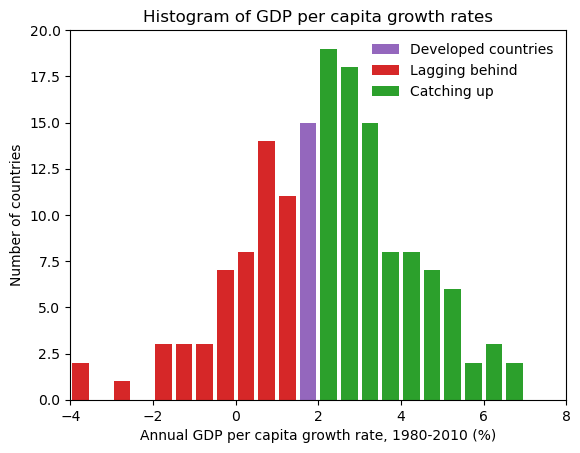

In [15]:
x_80 = pwt.xs(1980, level='year')['rgdpe']/pwt.xs(1980, level='year')['pop']

x_10 = pwt.xs(2010, level='year')['rgdpe']/pwt.xs(2010, level='year')['pop']
g = 100*((x_10/x_80)**(1/(2010-1980))-1)
plt.hist(g.dropna(), np.arange(1.5, 2.5, 0.5), histtype='bar', rwidth=0.8, fc='C4', label='Developed countries')
plt.hist(g.dropna(), np.arange(-10, 2, 0.5), histtype='bar', rwidth=0.8, fc='C3', label='Lagging behind')
plt.hist(g.dropna(), np.arange(2, 10, 0.5), histtype='bar', rwidth=0.8, fc='C2', label='Catching up')

plt.xlim(-4, 8)

plt.title('Histogram of GDP per capita growth rates')
plt.xlabel('Annual GDP per capita growth rate, 1980-2010 (%)')
plt.ylabel('Number of countries')

plt.legend(frameon=False)

plt.show()

This histogram emphasizes the economic divergence and convergence trends across countries during the stutdied priod. There appears to be a concentration of countries within the moderate groth rate range, indicating that many developed economies experiecnce steady and modest growth.
A subtantial nunber of countries are in the low or even negative growth rate range, which means this group likely includes economies that faced difficulties such as polotical instability or economic crisis. 
In summary, this distribution reflects varying degrees of economic development and the influence of global economic dynamics over three decades. 

### Part B: Solow Model

**Task 1**:

The steady-state level of capital per worker (k∗) is achieved when the amount of new capital added through savings equals the amount of lost capital (through depreciation and population growth). In this state, the economy grows constantly without changing capital per worker.
\begin{align}
s \cdot f(k^*) = (\delta + n) k^*
\end{align}

or
\begin{align}
k^* = \left(\frac{s \cdot A}{\delta + n}\right)^{\frac{1}{1 - \alpha}}
\end{align}


In [17]:
A = 1
α = 1/3
δ = 0.4
n = 0.05
s = 0.5
k_initial = 0.25
periods = 50

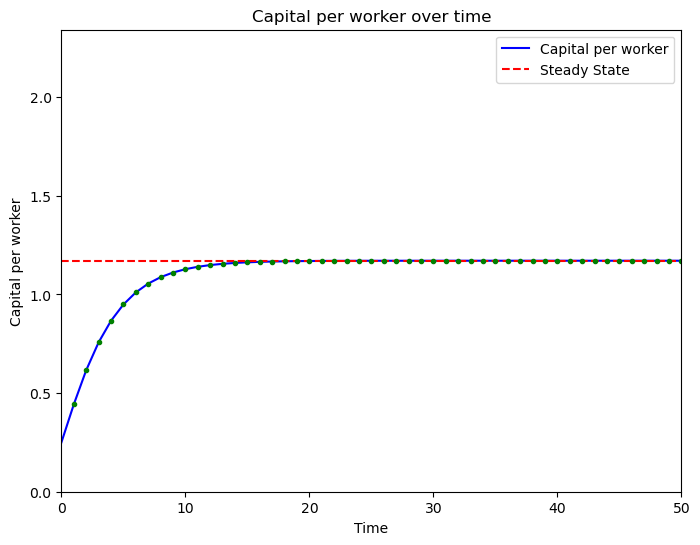

Steady state level of capital per worker = 1.1712


In [28]:
k_ss = ((s * A) / (δ + n)) ** (1 / (1 - α))
k_t = np.zeros(periods + 1)
k_t[0] = k_initial

def f(k):
    return k**α
    
def k_next(k):
    return ( s*A*f(k) + (1-δ)*k ) / (1+n)
    
# Simulation of capital accumulation over time
for t in range(1, periods + 1):
    k_t[t] = k_next(k_t[t - 1])

# Plotting the evolution of capital per worker
plt.figure(figsize=(8, 6))
plt.plot(k_t, label='Capital per worker', color='blue')
plt.axhline(y=k_ss, color='red', linestyle='dashed', label='Steady State')

# Mark the transition period
for t in range(1, periods + 1):
    plt.plot(t, k_t[t], 'o', color='green',markersize=3)

plt.title('Capital per worker over time')
plt.xlabel('Time')
plt.ylabel('Capital per worker')
plt.legend()
plt.ylim(0, 2 * k_ss)
plt.show()

print('Steady state level of capital per worker =', round(k_ss, 4))

The initial level of capital per worker is 0.25, when it rises to 1.1712, it reaches the steady state. The gradual approach to steady-state capial highlight the long-term nature of economic adjustments, suggests that policy changes affect savings, investment or productivity would take time to have the full impact on the economy, in this case, it takes about 13 years to reach the steady-state from the initial level. 